In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# read dataset
dataSet = pd.read_csv("../Data/widsdatathon2024-university/train.csv")

# check data for NaN
print(dataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27674 entries, 0 to 27673
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             27674 non-null  int64  
 1   patient_race                           12522 non-null  object 
 2   payer_type                             24838 non-null  object 
 3   patient_state                          27595 non-null  object 
 4   patient_zip3                           27674 non-null  int64  
 5   patient_age                            27674 non-null  int64  
 6   patient_gender                         27674 non-null  object 
 7   bmi                                    8749 non-null   float64
 8   breast_cancer_diagnosis_code           27674 non-null  object 
 9   breast_cancer_diagnosis_desc           27674 non-null  object 
 10  breast_cancer_diagnosis_year           27674 non-null  int64  
 11  me

In [41]:
new_train_dataset = dataSet.copy()

In [42]:
# manually encode the ICD10 code to description 
ICD10_code_description_dict = {'C770':"Secondary and unspecified malignant neoplasm of lymph nodes of head, face and neck", 
 'C771': "Secondary and unspecified malignant neoplasm of intrathoracic lymph nodes",
 'C772': "Secondary and unspecified malignant neoplasm of intra-abdominal lymph nodes", 
 'C773': "Secondary and unspecified malignant neoplasm of axilla and upper limb lymph nodes",
 'C774': "Secondary and unspecified malignant neoplasm of inguinal and lower limb lymph nodes",
 'C775': "Secondary and unspecified malignant neoplasm of intrapelvic lymph nodes",
 'C778': "Secondary and unspecified malignant neoplasm of lymph nodes of multiple regions",
 'C779': "Secondary and unspecified malignant neoplasm of lymph node, unspecified",
 'C7800': "Secondary malignant neoplasm of unspecified lung",
 'C7801': "Secondary malignant neoplasm of right lung",
 'C7802': "Secondary malignant neoplasm of left lung",
 'C781': "Secondary malignant neoplasm of mediastinum",
 'C782': "Secondary malignant neoplasm of pleura",
 'C7830': "Secondary malignant neoplasm of unspecified respiratory organ"
 'C7839': "Secondary malignant neoplasm of other respiratory organs",
 'C784': "Secondary malignant neoplasm of small intestine" ,
 'C785':"Secondary malignant neoplasm of large intestine and rectum",
'C786':"Secondary malignant neoplasm of retroperitoneum and peritoneum",
'C787': "Secondary malignant neoplasm of liver and intrahepatic bile duct",
 'C7880': "Secondary malignant neoplasm of unspecified digestive organ",
'C7889': "Secondary malignant neoplasm of other digestive organs",
 'C7900': "Secondary malignant neoplasm of unspecified kidney and renal pelvis", 
 'C7901': "Secondary malignant neoplasm of right kidney and renal pelvis", 
 'C7902': "Secondary malignant neoplasm of left kidney and renal pelvis",
'C7910': "Secondary malignant neoplasm of unspecified urinary organs",
'C792': "Secondary malignant neoplasm of skin",
 'C7931': "Secondary malignant neoplasm of brain", 
 'C7932': "Secondary malignant neoplasm of cerebral meninges",
 'C7940': "Secondary malignant neoplasm of unspecified part of nervous system", 
 'C7949': "Secondary malignant neoplasm of other parts of nervous system",
'C7951': "Secondary malignant neoplasm of bone",
'C7952': "Secondary malignant neoplasm of bone marrow" ,
 'C7960': "Secondary malignant neoplasm of unspecified ovary",
'C7961': "Secondary malignant neoplasm of right ovary",
'C7962': "Secondary malignant neoplasm of left ovary",
 'C7970':"Secondary malignant neoplasm of unspecified adrenal gland",
 'C7971': "Secondary malignant neoplasm of right adrenal gland",
'C7972': "Secondary malignant neoplasm of left adrenal gland",
'C7981':"Secondary malignant neoplasm of breast",
'C7982': "Secondary malignant neoplasm of genital organs",
'C7989': "Secondary malignant neoplasm of other specified sites",
 'C799': "Secondary malignant neoplasm of unspecified site"}

In [39]:
new_train_dataset["metastatic_cancer_diagnosis_description"] = new_train_dataset["metastatic_cancer_diagnosis_code"].map(ICD10_code_description_dict)

In [40]:
new_dataset

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd,metastatic_cancer_diagnosis_description
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.00,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35,Secondary and unspecified malignant neoplasm o...
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,2.234043,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33,Secondary malignant neoplasm of bone
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,7.915094,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24,Secondary and unspecified malignant neoplasm o...
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455,Secondary malignant neoplasm of liver and intr...
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,6.089474,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162,Secondary malignant neoplasm of other specifie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,728161,NaN,COMMERCIAL,MO,653,52,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,3.232258,3.632258,18.767742,13.967742,1.316129,25.770968,9.787097,9.780645,25,Secondary and unspecified malignant neoplasm o...
27670,203896,NaN,COMMERCIAL,IN,462,39,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,5.362162,9.562162,12.751351,14.489189,2.813514,23.686111,8.537838,6.191892,22,Secondary and unspecified malignant neoplasm o...
27671,740115,Hispanic,MEDICAID,TX,769,41,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,6.691304,32.408696,11.359091,12.080952,4.050000,21.588889,16.104545,9.513043,28,Secondary and unspecified malignant neoplasm o...
27672,122759,NaN,COMMERCIAL,AZ,853,53,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.608696,35.059420,17.285294,16.342647,4.460294,26.421875,11.176471,12.642029,169,Secondary and unspecified malignant neoplasm o...


In [33]:
np.unique(dataSet['metastatic_cancer_diagnosis_code'])

array(['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C778', 'C779',
       'C7800', 'C7801', 'C7802', 'C781', 'C782', 'C7839', 'C784', 'C785',
       'C786', 'C787', 'C7880', 'C7889', 'C7900', 'C7901', 'C7902',
       'C7910', 'C792', 'C7931', 'C7932', 'C7940', 'C7949', 'C7951',
       'C7952', 'C7960', 'C7961', 'C7962', 'C7970', 'C7971', 'C7972',
       'C7981', 'C7982', 'C7989', 'C799'], dtype=object)

(array([3.767e+03, 5.693e+03, 4.746e+03, 3.520e+03, 2.408e+03, 1.219e+03,
        8.150e+02, 5.210e+02, 4.520e+02, 3.440e+02, 3.940e+02, 5.540e+02,
        3.970e+02, 3.100e+02, 2.510e+02, 2.360e+02, 1.800e+02, 1.490e+02,
        1.010e+02, 1.010e+02, 1.210e+02, 9.600e+01, 9.200e+01, 8.700e+01,
        7.500e+01, 6.800e+01, 6.400e+01, 5.700e+01, 6.600e+01, 6.300e+01,
        3.600e+01, 4.100e+01, 6.100e+01, 4.800e+01, 4.500e+01, 4.100e+01,
        3.500e+01, 2.700e+01, 3.100e+01, 2.800e+01, 2.800e+01, 2.600e+01,
        2.600e+01, 2.300e+01, 3.000e+01, 2.400e+01, 2.400e+01, 2.700e+01,
        2.200e+01, 2.000e+01, 1.300e+01, 1.100e+01, 1.000e+01, 1.000e+01,
        7.000e+00, 1.000e+01, 4.000e+00, 8.000e+00, 3.000e+00, 8.000e+00]),
 array([   0.  ,   24.25,   48.5 ,   72.75,   97.  ,  121.25,  145.5 ,
         169.75,  194.  ,  218.25,  242.5 ,  266.75,  291.  ,  315.25,
         339.5 ,  363.75,  388.  ,  412.25,  436.5 ,  460.75,  485.  ,
         509.25,  533.5 ,  557.75,  582.  ,  

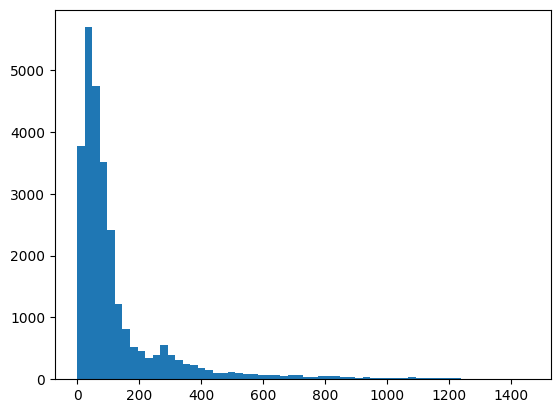

In [29]:
plt.hist(dataSet['treatment_pd'], bins=60)

In [4]:
dataSet.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_5

In [5]:
# check for the number of missing values
missingValues = dataSet.isnull().sum()
pd.set_option('display.max_rows', 500)
display(missingValues)

patient_id                                   0
patient_race                             15152
payer_type                                2836
patient_state                               79
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                      18925
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
breast_cancer_diagnosis_year                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_treatment                   0
metastatic_first_treatment_type          11024
metastatic_first_novel_treatment         27441
metastatic_first_novel_treatment_type    27441
region                                     223
division                                   223
population                                   0
density                                      0
age_median                                   0
age_under_10 

In [6]:
# Get general description of data
dataSet.describe()

,patient_id,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
count,27674.000000,27674.000000,27674.000000,8749.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,...,27674.000000,27674.000000,27674.000000,27674.000000,27671.000000,27671.000000,27674.000000,27674.000000,27674.000000,27674.000000
mean,549586.828612,522.024752,54.456421,29.277804,2016.486449,19919.850799,1655.023291,40.674047,11.117255,12.883595,...,5.352033,6.473921,17.862817,13.432810,13.324371,4.603184,28.061654,8.573778,7.079766,134.218472
std,260306.291181,292.405178,11.202089,5.636923,1.058602,13465.788962,3639.259482,4.026393,1.535440,1.880894,...,5.955250,3.539440,17.513898,3.801799,5.724183,6.595424,4.893231,4.306563,3.098581,187.759654
min,100051.000000,6.000000,19.000000,14.000000,2015.000000,636.000000,0.821739,20.600000,0.000000,6.314286,...,0.002564,0.433333,0.060714,4.600000,3.433333,0.000000,12.460784,1.165385,1.200000,0.000000
25%,323742.250000,294.000000,47.000000,25.000000,2016.000000,9080.000000,169.322727,37.734426,10.149254,11.788406,...,1.307353,3.892593,4.608824,10.270492,9.341176,0.980851,24.968182,5.497143,4.972222,36.000000
50%,549720.000000,490.000000,55.000000,28.820000,2016.000000,18355.000000,627.904167,40.761765,11.022034,12.923944,...,3.355556,5.578689,11.588889,13.069492,12.122857,2.636000,27.814286,7.441772,6.882222,70.000000
75%,775422.250000,784.000000,62.000000,33.000000,2017.000000,27796.000000,1555.107692,43.175862,12.194737,13.930435,...,7.630000,8.663889,24.485185,15.611765,16.408333,5.958333,30.918519,10.685417,8.678846,133.000000
max,999996.000000,999.000000,91.000000,97.000000,2018.000000,71374.000000,29851.685710,57.417647,17.675000,35.300000,...,33.188889,26.429870,99.104348,35.155556,48.931818,74.067391,48.020000,29.565000,25.200000,1455.000000


In [7]:
# Get dataset column names
dataSet.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_5

In [8]:
# Now that we know many details about our dataset, we can go ahead and make sure our data is clean and does not have missing values.
# Some technics for data processing: 
    # 1. Remove rows with missing data -> it can reduce the amount of data dramatically and affect your prediction result
    # 2. Impute missing values -> it can be used to impute missing values with meaningful values. Common imputation methods: using mean, mode, median 
        # or advanced methods such as regression imputation. In simple words regression imputation uses existing data to predict missing data.
        
# For now lets simply delete rows with missing data

new_dataset = dataSet.dropna(axis=0)
new_dataset.describe()

,patient_id,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,548686.384615,567.615385,50.653846,28.562308,2016.038462,19579.615385,1441.389813,40.938629,11.259203,13.107102,...,4.793791,6.472825,15.852145,12.504549,11.710157,4.698737,27.447651,7.169956,7.278489,353.769231
std,240060.609710,275.868386,12.868387,4.831251,0.999230,14357.104750,3344.704260,3.715439,1.274834,1.743373,...,4.836537,3.194211,14.234054,2.669084,4.694123,5.345701,5.101061,2.805514,2.671996,332.122183
min,118155.000000,112.000000,36.000000,20.120000,2015.000000,3787.000000,7.278261,30.371429,7.691304,10.414894,...,0.567532,2.528571,2.028889,8.845238,5.127027,0.190566,15.407143,4.077778,1.755263,2.000000
25%,372819.250000,364.500000,41.250000,25.505000,2015.000000,10620.000000,208.747856,40.249129,10.328139,12.148452,...,0.993416,4.109382,4.645189,10.213676,8.865162,0.931948,24.353488,4.777273,5.491171,60.500000
50%,520055.500000,600.500000,48.500000,28.975000,2016.000000,16773.000000,577.128320,41.611429,11.413533,13.007120,...,3.797094,5.737692,10.775857,12.448831,10.442250,3.206004,27.779952,6.949091,7.406140,251.500000
75%,722333.750000,809.000000,56.750000,31.727500,2017.000000,22670.750000,1051.832917,42.533522,12.168900,14.076014,...,5.976836,8.508333,20.385246,14.270092,12.589988,5.218813,30.122768,8.083132,9.049245,570.500000
max,935440.000000,928.000000,91.000000,38.560000,2018.000000,71374.000000,17326.407890,50.465217,13.421311,18.864286,...,17.525532,13.112766,48.789362,17.800000,23.346154,20.020000,42.502632,14.700000,11.195349,1134.000000


In [9]:
# Select some features and save them in a list
# There are advanced technics for featutre selection such as Correlation Analysis,Recursive Feature Elimination (RFE), etc. 
# For now we simply doing it manualy

important_features = ['patient_age', 'population', 'density']

# create a dataset based on selected features and new data set 
X = new_dataset[important_features]
X.describe()

,patient_age,population,density
count,26.000000,26.000000,26.000000
mean,50.653846,19579.615385,1441.389813
std,12.868387,14357.104750,3344.704260
min,36.000000,3787.000000,7.278261
25%,41.250000,10620.000000,208.747856
50%,48.500000,16773.000000,577.128320
75%,56.750000,22670.750000,1051.832917
max,91.000000,71374.000000,17326.407890


In [10]:
X.head()

,patient_age,population,density
137,41,23266,743.557143
451,58,19826,437.300000
2561,51,3787,7.278261
4842,47,18397,927.830000
7965,77,10227,452.832727


In [11]:
# Build simple model using sklearn
# create target
y = new_dataset.treatment_pd
dataset_model = DecisionTreeRegressor(random_state=1)
dataset_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [12]:
#simple prediction example (its based on three features)

print(X)
print("The predictions are: ")
print(dataset_model.predict(X))

       patient_age  population       density
137             41       23266    743.557143
451             58       19826    437.300000
2561            51        3787      7.278261
4842            47       18397    927.830000
7965            77       10227    452.832727
8671            53       40163    875.119355
9091            39       12912    292.373684
9499            47       39122   2295.939394
9594            61        8101    246.281013
10040           39       13386    124.465000
10284           60       16996   1614.772059
15770           36       18717   1019.506667
16953           39       12948   1662.475000
17309           57        4435     68.001887
18545           36       16550    245.097917
18762           37       11799    137.880000
18965           56       25744    981.763077
19417           42       16550    245.097917
19969           54       20161   1062.608333
20923           54       32795   1896.220930
21637           91        9521    163.150633
22192     

In [13]:
# lets compare our prediction with real values
print(f"New dataset treatment_pd column: \n{new_dataset.treatment_pd}\n\nPredictions: {dataset_model.predict(X)}")

New dataset treatment_pd column: 
137       786
451        26
2561       23
4842       24
7965      530
8671      129
9091      422
9499      190
9594      743
10040     131
10284     584
15770      60
16953      16
17309     495
18545     186
18762     393
18965     661
19417     316
19969     313
20923     981
21637      36
22192     171
22696       2
23833    1134
26495     784
27265      62
Name: treatment_pd, dtype: int64

Predictions: [ 786.   26.   23.   24.  530.  129.  422.  190.  743.  131.  584.   60.
   16.  495.  186.  393.  661.  316.  313.  981.   36.  171.   32. 1134.
  784.   32.]


In [14]:
# Evaluating the accuracy of the prediction using Mean Absolute Error (MAE)
# This is  "In Sample" score, meaning we used same sample for building and evaluating the model.

mean_absolute_error(y, dataset_model.predict(X))

2.3076923076923075

In [48]:
np.unique(test_data['metastatic_cancer_diagnosis_code'])

array(['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C778', 'C779',
       'C7800', 'C7801', 'C7802', 'C781', 'C782', 'C7830', 'C7839',
       'C784', 'C785', 'C786', 'C787', 'C7880', 'C7889', 'C7901', 'C7902',
       'C7911', 'C792', 'C7931', 'C7932', 'C7940', 'C7949', 'C7951',
       'C7952', 'C7960', 'C7961', 'C7962', 'C7970', 'C7971', 'C7972',
       'C7981', 'C7982', 'C7989', 'C799'], dtype=object)

In [49]:
 (np.unique(dataSet['metastatic_cancer_diagnosis_code']))

array(['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C778', 'C779',
       'C7800', 'C7801', 'C7802', 'C781', 'C782', 'C7839', 'C784', 'C785',
       'C786', 'C787', 'C7880', 'C7889', 'C7900', 'C7901', 'C7902',
       'C7910', 'C792', 'C7931', 'C7932', 'C7940', 'C7949', 'C7951',
       'C7952', 'C7960', 'C7961', 'C7962', 'C7970', 'C7971', 'C7972',
       'C7981', 'C7982', 'C7989', 'C799'], dtype=object)

In [15]:
# Read test data
test_data = pd.read_csv("../Data/widsdatathon2024-university/test.csv")

X_test = test_data[important_features]
X_test.describe()


,patient_age,population,density
count,11845.000000,11845.000000,11845.000000
mean,54.348417,19813.338117,1660.511727
std,11.252600,13544.525628,3649.073983
min,18.000000,11.000000,0.821739
25%,47.000000,8864.000000,163.150633
50%,55.000000,17969.000000,626.236667
75%,62.000000,27504.000000,1555.107692
max,91.000000,71374.000000,29851.685710


In [16]:
print(dataset_model.predict(X_test))

[661. 316. 530. ... 316. 584. 743.]


In [17]:
train_data_set = dataSet.iloc[:11845]

test_y = train_data_set.treatment_pd
mean_absolute_error(test_y, dataset_model.predict(X_test))


367.9155761924863

In [18]:
from sklearn.ensemble import RandomForestRegressor

ran_forest_model = RandomForestRegressor(random_state=1)

train_y_ran = train_data_set.treatment_pd
X_train_ran = train_data_set[important_features]

ran_forest_model.fit(X_train_ran, train_y_ran)

ran_model_predict = ran_forest_model.predict(X_test)
ran_model_predict

array([ 65.34678571, 110.65533333, 166.98775   , ...,  73.46733333,
       151.545     ,  52.81725   ])

In [19]:
mean_absolute_error(test_y, ran_forest_model.predict(X_test))

130.4891453928685